In [1]:
import numpy as np
import gym
import minihack
import time
import matplotlib.pyplot as plt
from rules_new import RuleNew, initial_population, print_rule, make_rule_good
from fitness_new import FitnessCalculator, movement_score, proximity_score, find_distance_grid, get_population_fitness
from genetic_new import genetic_algorithm
from utility_func import *

In [2]:
env=gym.make(
        "MiniHack-Room-Random-15x15-v0",
        observation_keys=("chars", "colors", "specials", "pixel"),
    )

obs = env.reset() #Generate a new environment and save the describtions arrays in obs
env.render() #Print the room 


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ...............                                 
                                ...........@...                                 
                                ...............                                 
                                .......>.......                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                           

In [3]:
agent_position = search_environment_agent_position(obs["chars"])
goal_position = search_environment_goal_position(obs["chars"])
goal_position = goal_position[0] - 3, goal_position[1] - 32
agent_position = agent_position[0] - 3, agent_position[1] - 32
print(agent_position)
print(goal_position)
distance_grid = find_distance_grid(*goal_position)
print(distance_grid)

(2, 11)
(4, 7)
[[ 7  6  5  4  4  4  4  4  4  4  4  4  5  6  7]
 [ 7  6  5  4  3  3  3  3  3  3  3  4  5  6  7]
 [ 7  6  5  4  3  2  2  2  2  2  3  4  5  6  7]
 [ 7  6  5  4  3  2  1  1  1  2  3  4  5  6  7]
 [ 7  6  5  4  3  2  1  0  1  2  3  4  5  6  7]
 [ 7  6  5  4  3  2  1  1  1  2  3  4  5  6  7]
 [ 7  6  5  4  3  2  2  2  2  2  3  4  5  6  7]
 [ 7  6  5  4  3  3  3  3  3  3  3  4  5  6  7]
 [ 7  6  5  4  4  4  4  4  4  4  4  4  5  6  7]
 [ 7  6  5  5  5  5  5  5  5  5  5  5  5  6  7]
 [ 7  6  6  6  6  6  6  6  6  6  6  6  6  6  7]
 [ 7  7  7  7  7  7  7  7  7  7  7  7  7  7  7]
 [ 8  8  8  8  8  8  8  8  8  8  8  8  8  8  8]
 [ 9  9  9  9  9  9  9  9  9  9  9  9  9  9  9]
 [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]]


In [4]:
initial_pop = initial_population(150)
for rule in initial_pop:
    make_rule_good(rule)



In [5]:
proximity_score = lambda distance: 1/np.sqrt(distance)
fitness_calculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

fitness_list = get_population_fitness(initial_pop, fitness_calculator)
fitness_list = np.array(fitness_list)
print(np.sum(fitness_list))

23.909637366066764


In [6]:
fitness_list = fitness_list - np.min(fitness_list)

# parallelize code of genetic algorithm 
new_population, new_fitness, sum_fitnesses = genetic_algorithm(distance_grid=distance_grid,
                                                population=initial_pop,
                                                fitness_calculator=fitness_calculator,
                                                fitness_list=fitness_list,
                                                chance_for_mutation=0,
                                                n_iterations=400,
                                                n_rules=150)

print(sum_fitnesses)

  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [01:07<00:00,  5.90it/s]

[  254.36021877   612.6363362    905.15523261  1210.21037175
  1447.69541658  1735.00583256  1956.92613952  2277.39066878
  2444.15423687  2660.07488954  2865.07218619  3009.02830701
  3321.98994771  3495.04460506  3659.8252847   3825.21288024
  3939.53768156  4044.84488824  4235.51652142  4398.76339317
  4439.83506501  4545.70112615  4647.92909415  4692.62112829
  4694.04181992  4755.35841898  4883.34184446  4990.33972672
  5172.4353638   5313.5713393   5493.20166541  5580.2323759
  5678.48932213  5810.12513567  5878.82053355  5942.99675113
  5947.51791352  6082.75229714  6246.64344225  6377.07687792
  6416.29761105  6386.48970605  6389.41439117  6444.07293595
  6548.5631016   6638.42640628  6736.07973007  6816.42691594
  6870.78946346  7116.84006972  7120.67075641  7196.33196669
  7343.06647092  7351.1387974   7410.47161617  7387.67642633
  7481.70661033  7460.18556921  7445.00479837  7312.22973908
  7402.4223868   7462.58690477  7496.18615775  7597.0645519
  7622.31484011  7641.0401

In [7]:
new_fitness=np.array(new_fitness)
ind = np.argmax(new_fitness)
best_rule = new_population[ind]
print_rule(best_rule)

→ ↘ ↘ ↘ ↘ ↘ → ↘ ↘ ↘ ↓ ↘ ↙ ← ← 
↑ → ↑ ↓ → ↓ ↓ ↙ ↙ ← ↓ ← ↑ ← ↙ 
↑ → → ↗ ↘ ↘ → ↙ ↙ ↙ ↙ ↓ ← ↖ ← 
↑ → ↘ ↘ → ↘ ↘ ↓ ↙ ↙ ↙ ← ← ↖ ↙ 
→ ↖ ↘ → → ↘ → ↘ ↖ ↖ ↙ ↖ ↑ ↙ ↙ 
↘ ↗ ↘ ↘ ↘ ↗ ↗ ↑ ↖ ← ↖ ↗ ↑ ↑ ↙ 
↘ ↘ ↘ → ↗ ↗ ↗ ↑ ↖ ↖ ↖ ← ↙ ↖ ↑ 
↘ → → ↓ ↗ ↑ ↖ ↗ ↖ ↖ ↑ ↙ ↙ ↖ ↙ 
↓ ↑ ↘ ↑ ↑ ↗ ↗ ↑ ↖ ← ↖ ↖ ← ↖ ↙ 
↗ ↗ ↑ ↑ ↑ ↖ ↖ ← ↑ ↖ ↑ ↑ ↑ ← ← 
↘ ↗ ↖ ↑ ↗ ↗ ↗ ↓ ↘ ↖ ← → ↖ ↖ ↖ 
↗ ↖ ↗ ↓ ↑ ↖ ↗ ↑ ↗ ↖ ← ↖ ↗ ↑ ↑ 
→ ↗ ↘ ↑ ↖ ← ↗ ↖ → ↑ ↗ ↖ ↗ ↑ ↑ 
↗ ← ↑ ↖ ↖ ↖ ↗ ↑ ↖ ↑ ↑ → ↗ ← ↑ 
↑ ↗ ↑ ↖ ↖ ↑ ↑ ↖ → → ↖ ↑ ↖ ↗ ↑ 


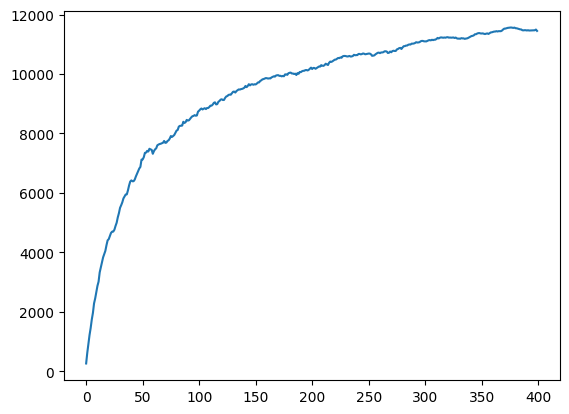

In [8]:
plt.plot(sum_fitnesses)

In [9]:
FitnessCalculator = FitnessCalculator(movement_score, proximity_score, distance_grid)

# A matrix containing the directions of the arrows to the objective

# Get the fitness matrix
score_matrix = FitnessCalculator.fitness_matrix(best_rule)

print(score_matrix)

[[ 0.37796447  0.40824829  0.4472136   0.5         0.5         0.5
   0.          0.5         0.5         0.5         0.5        -0.5
   0.4472136   0.40824829  0.37796447]
 [ 0.          0.40824829  0.          0.          0.          0.57735027
   0.57735027  0.57735027  0.57735027  0.          0.          0.5
   0.          0.40824829  0.37796447]
 [ 0.          0.40824829  0.4472136   0.5         0.57735027  0.70710678
   0.          0.70710678  0.70710678  0.70710678  0.57735027  0.
   0.4472136   0.40824829  0.37796447]
 [ 0.          0.40824829  0.4472136   0.5         0.57735027  0.70710678
   1.          1.          1.          0.70710678  0.57735027  0.5
   0.4472136   0.40824829  0.37796447]
 [ 0.37796447 -0.40824829  0.4472136   0.5         0.57735027  0.70710678
   1.          0.          0.          0.70710678  0.57735027  0.5
   0.          0.40824829  0.37796447]
 [ 0.37796447  0.40824829  0.4472136   0.5         0.57735027  0.70710678
   1.          1.          1.     

goal


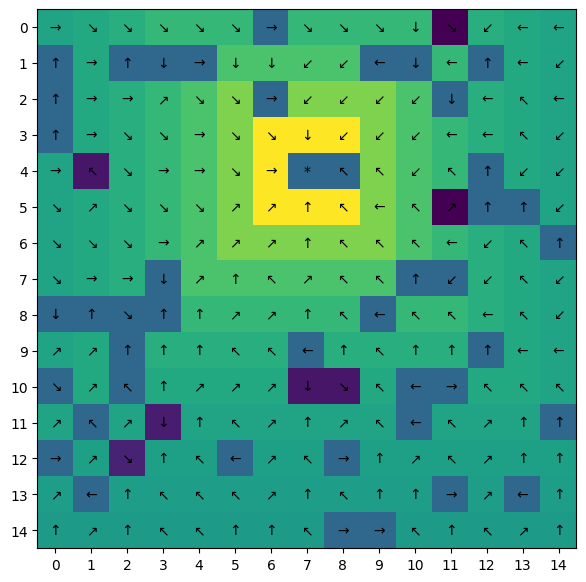

In [10]:
arrow_dictionary = {
    0 : "\u2191",
    1 : "\u2192",
    2 : "\u2193",
    3 : "\u2190",
    4 : "\u2197",
    5 : "\u2198",
    6 : "\u2199",
    7 : "\u2196",
}

# Replace these with your actual matrices and alphanumeric arrow values
matrix_of_scores = score_matrix
arrows_list = []

# Fill with all the right movements from print_rule(best_rule)
for i in range(15):
    for j in range(15):
        arrows_list.append(arrow_dictionary[best_rule.rules_grid[i][j]])

fig, ax = plt.subplots()
im = ax.imshow(matrix_of_scores)


#adjust the size of the figure
fig.set_size_inches(12, 7)

ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

for i in range(15):
    for j in range(15):
        if (i, j) == goal_position:
            print("goal")
            ax.annotate("*", xy=(j, i), ha='center', va='center', color='black')
        else:
            ax.annotate(arrows_list[i*15 + j], xy=(j, i), ha='center', va='center', color='black')

In [11]:
## Apply the rule to the env (env.step) until the goal is reached

print("Goal position:", goal_position)
visited_position=np.zeros(shape=(15,15), dtype=int)
total_step=0

while agent_position != goal_position:
    
    print("Agent position:", agent_position)
    
    x, y = agent_position
    
    if visited_position[x][y]==1:
        movement=np.random.randint(0,7)
        while not good_movement((x,y), movement):
            movement = np.random.randint(0, 7)  # mutation
        env.step(movement)
    else:
        movement = best_rule.get_movement(x, y)
        env.step(movement)

    agent_position = (agent_position[0] + int_to_coord[movement][0], 
                        agent_position[1] + int_to_coord[movement][1])
   
    visited_position[x][y]=1
    total_step+=1

    if agent_position == goal_position:
        print("Goal reached!")
        break

    env.render()

print(total_step)

Goal position: (4, 7)
Agent position: (2, 11)

                                                                                
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ...............                                 
                                ...........<...                                 
                                ...........@...                                 
                                .......>.......                                 
                                ...............                                 
                                ...............                                 
                                ...............               